In [ ]:
# Instagram reach analysis and prediction using XGBoost Regressor and random forest regressor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,median_absolute_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
df=pd.read_csv("/content/Instagram data.csv", encoding="latin1")
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [ ]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [ ]:
x=df.drop(['Impressions','Caption','Hashtags'],axis=1)
y=df['Impressions']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(95, 10)
(24, 10)
(95,)
(24,)


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
xgb_model=xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.05, max_depth=7)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xgb_model.predict(x_test)
print(y_pred)

[ 5051.315   7302.8877  3154.8445  4221.65    5285.9287 27422.12
  3831.341   2347.0383 10346.354   5375.8906  6154.0664  8318.338
  3787.9468  2801.5828  4166.638   4166.92    2868.2402  4272.1816
  3970.4824  5066.549   7450.651  24537.982   5285.9287  5792.9956]


In [ ]:
print(xgb_model.score(x_test, y_test))
print(xgb_model.score(x_train, y_train))

0.8826029300689697
0.99568772315979


In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 874.4533081054688


In [ ]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4559438.0


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2135.284056045003


In [ ]:
r2=r2_score(y_test,y_pred)
print("R-squared:", r2)

R-squared: 0.8826029300689697


In [ ]:
mda=median_absolute_error(y_test,y_pred)
print("Median Absolute Error:", mda)

Median Absolute Error: 125.7000732421875


In [ ]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.08564987033605576


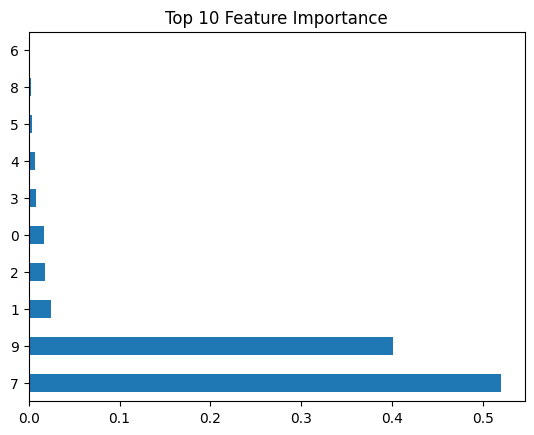

In [ ]:
feature_importance = pd.Series(xgb_model.feature_importances_)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importance")
plt.show()


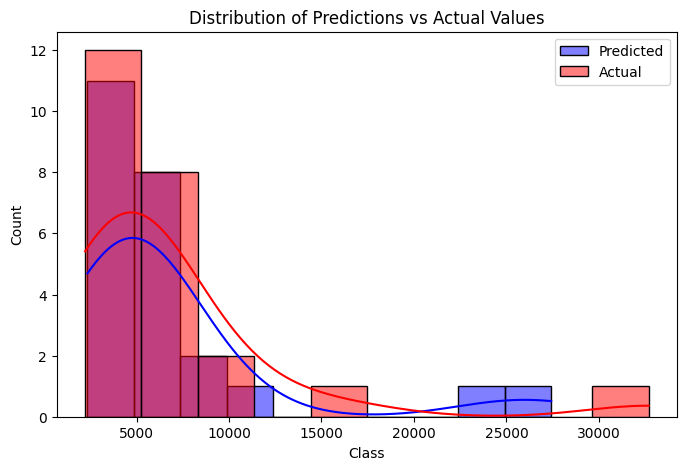

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


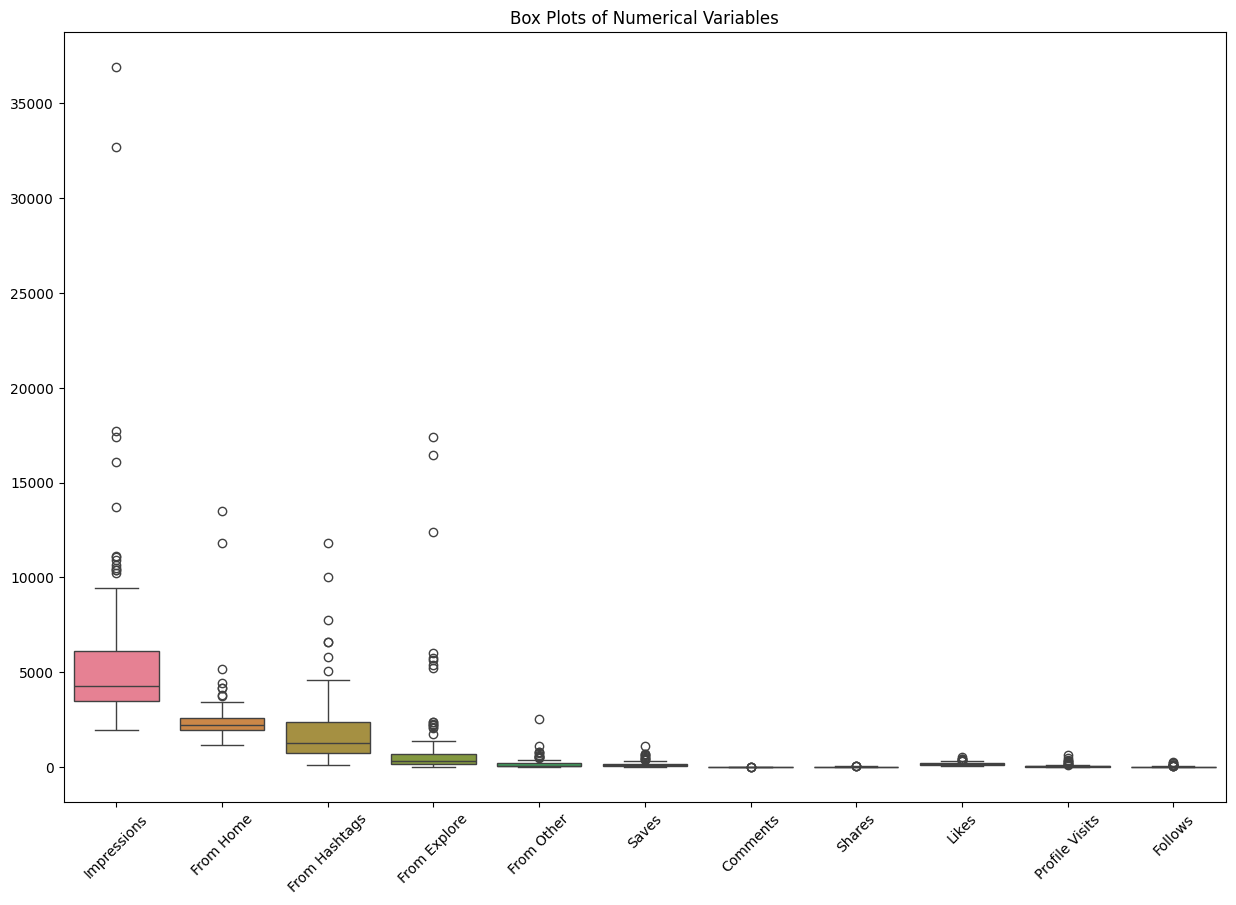

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#random forest regressor

In [ ]:
rf=RandomForestRegressor(n_estimators=1000)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_pred_rf=rf.predict(x_test)
print(y_pred_rf)

[ 5093.207  6702.35   3212.046  4158.072  5540.318 23856.39   3495.007
  2404.782 12487.335  5745.8    6617.516 10578.653  3954.298  2876.103
  4273.947  4094.752  2916.525  4192.655  3948.145  4654.815  9256.441
 13966.34   5540.318  5851.036]


In [ ]:
print(rf.score(x_test, y_test))
print(rf.score(x_train, y_train))

0.8999334429638723
0.9591925132140335


In [ ]:
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 881.109625


In [ ]:
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse)

Mean Squared Error: 3886359.7530192924


In [ ]:
mda = median_absolute_error(y_test, y_pred_rf)
print("Median Absolute Error:", mda)

Median Absolute Error: 256.70349999999985


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1971.3852370907348


In [ ]:
r2=r2_score(y_test,y_pred_rf)
print("R-squared:", r2)

R-squared: 0.8999334429638723


In [ ]:
print(mean_absolute_percentage_error(y_test, y_pred_rf))

0.09461475510295797


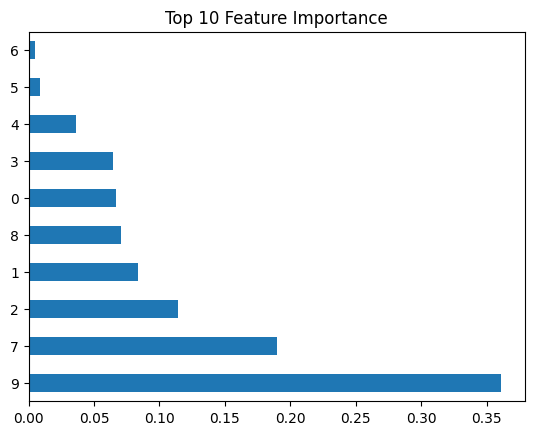

In [ ]:
feature_importance = pd.Series(rf.feature_importances_)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importance")
plt.show()


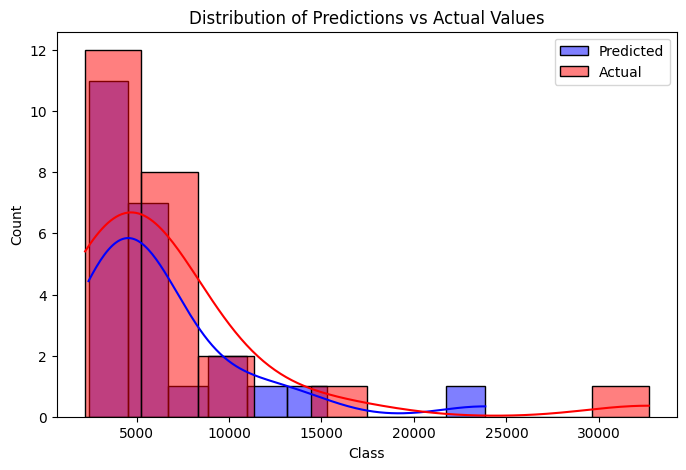

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_rf, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


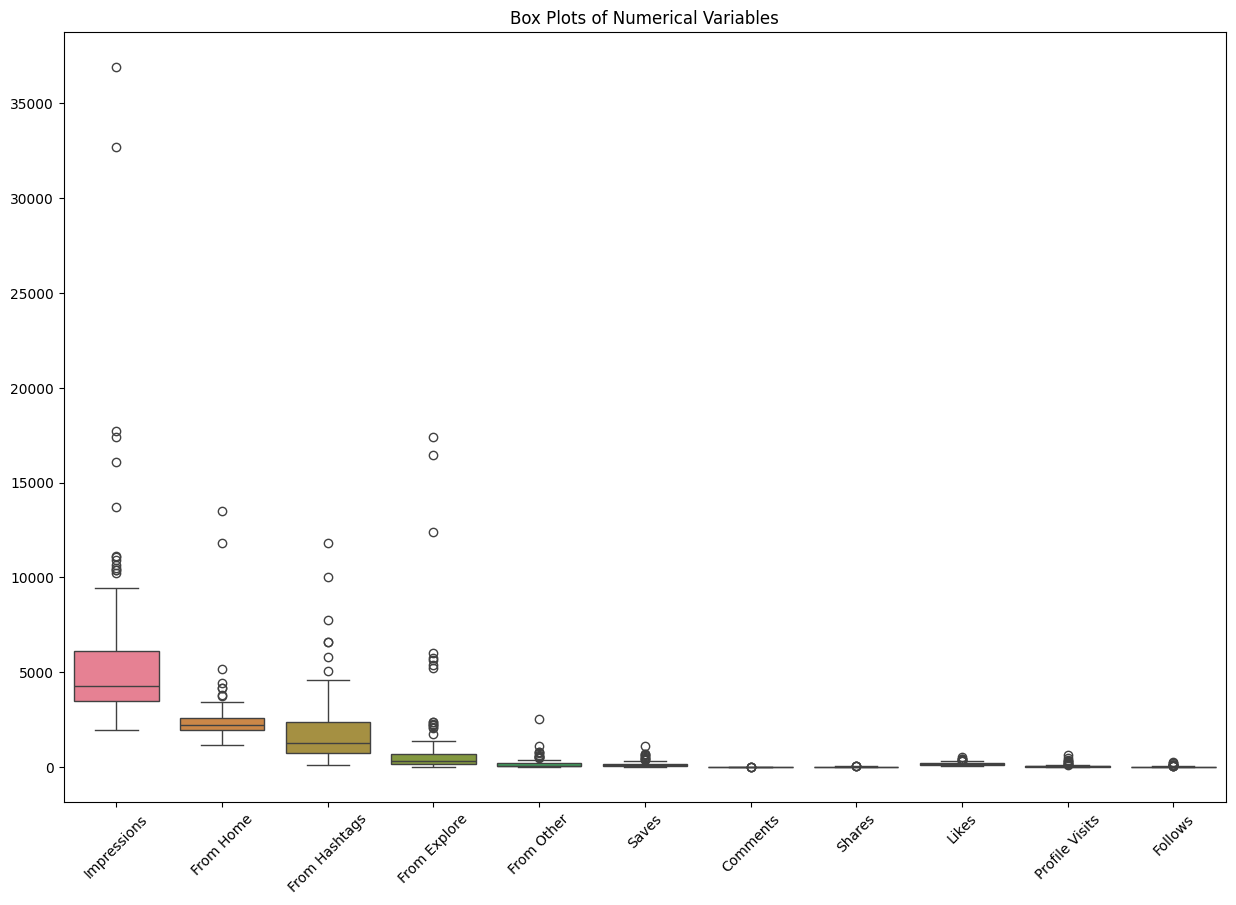

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()